In [37]:
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt


In [2]:
msg = pd.read_csv("Tamil_Senti.csv", sep ='\t', names = ['labels','messages'])

In [3]:
msg

,labels,messages
0,Negative,Enna da ellam avan seyal Mari iruku
1,Negative,This movei is just like ellam avan seyal
2,Positive,Padam vanthathum 13k dislike pottavaga yellam...
3,Positive,Neraya neraya neraya... ... V era level...thala
4,Positive,wow thavala sema mass....padam oru pundaikum ...
...,...,...
15739,Mixed_feelings,ivaru cinemala laam nalla tha prasuraaru...aa...
15740,Positive,Pattaya Kilaputhupaa trailer... !!!!! Get Raj...
15741,Mixed_feelings,En innum trending la varala? Ennada panringa ...
15742,not-Tamil,Rajnikant sir plz aap india ke pm ban jaao


In [4]:
lemma = WordNetLemmatizer()
corpus = []

In [5]:
import re
for i in range(0,len(msg)):
    r = re.sub('[^a-zA-Z]',' ',msg['messages'][i])
    r = r.lower()
    r = r.split()
    r = [lemma.lemmatize(word) for word in r if not word in stopwords.words('english')]
    r = ' '.join(r)
    corpus.append(r)

In [6]:
corpus

['enna da ellam avan seyal mari iruku',
 'movei like ellam avan seyal',
 'padam vanthathum k dislike pottavaga yellam yea da dislike pannom nu feel pannanum',
 'neraya neraya neraya v era level thala',
 'wow thavala sema mass padam oru pundaikum aagathu',
 'andha k unlike panavangaluku kolandha porakathu',
 'yaarellam frst like pottutu video paaka start paneenga hit like',
 'ethana padam vanthanu salt pepper mattum th l',
 'thala mass hvy sprt kerala surya anna fan',
 'elam avan jayal movie remake pa',
 'dhayavasenju indha padathula mass ila mayiru ila nu yevanum saavadikadheenga let role healthy',
 'vera lvl thala sammaaaaaaaaaaaaa bgm sammaya iruku',
 'romba nal aparam ajith ah normal ah pakaran siva oda build illama tharamana trailer',
 'nirav shah love u dear',
 'padam hit nu nenaikkuravange like podunge naan pottutten',
 'thevdiya pasangala intha trailer ku enna da kora evlo dislike uh punda mavanungalae',
 'dislike podura thevidiya kandara oooooooli pasangala',
 'neenga viswasam 

In [7]:
y = pd.get_dummies(msg['labels'])
y = y.iloc[:,1].values

# Bag of words

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_bag = cv.fit_transform(corpus).toarray()

# TF IDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer 
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()

# Word2vec

In [10]:
from gensim.models import Word2Vec
model = Word2Vec(corpus, min_count = 1)
X_model = model.wv

# Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, random_state = 0)

# NV Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB
nv_model = MultinomialNB().fit(X_train, y_train)
y_pred = nv_model.predict(X_test)

#  Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
random_state = 10 
l_reg = LogisticRegression()
lg_model = l_reg.fit(X_train, y_train)
y_lr_predict = l_reg.predict(X_test)

# SVM

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel = 'linear', gamma = 'auto', C = 2)
svm_model = classifier.fit(X_train, y_train)

In [ ]:
y_svm_predict = classifier.predict(X_test)

# Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test,y_pred)
cnf = confusion_matrix(y_test,y_lr_predict)

In [ ]:
print("Confusion matrix of NV Bayes: ",confusion_m)

In [25]:
cnf

array([[19,  0],
       [ 1,  0]], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score, classification_report
print("Naive_Bayes")
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)
print(report)
print(accuracy*100)
print("Logestic Regression")
accuracy_1 = accuracy_score(y_test,y_lr_predict)
report_1 = classification_report(y_test,y_lr_predict)
print(report_1)
print(accuracy_1*100)

Naive_Bayes
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20

95.0
Logestic Regression
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20

95.0


C:\Users\rajpu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajpu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajpu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajpu\anaconda3\lib\site-packages\sklearn\metr

Selecting best threshold value for better accuracy

In [30]:
pred=[]
for model in [nv_model,lg_model]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.6842105263157895


In [31]:
pd.concat(pred,axis=1)


,0,1
0,0.090456,0.137065
1,0.079471,0.170799
2,0.008809,0.081301
3,0.004275,0.059979
4,0.017960,0.166863
5,0.037292,0.098652
6,0.026630,0.114087
7,0.243991,0.194570
8,0.090232,0.242516
9,0.008284,0.001257


In [32]:
final_prediction

0     0.113760
1     0.125135
2     0.045055
3     0.032127
4     0.092412
5     0.067972
6     0.070359
7     0.219281
8     0.166374
9     0.004771
10    0.142063
11    0.033558
12    0.046114
13    0.016706
14    0.037944
15    0.157356
16    0.191043
17    0.170759
18    0.219327
19    0.014797
dtype: float64

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.21932738, 0.21932738, 0.15735627, 0.14206283, 0.00477061])

In [36]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
0,1.219327,0.95
1,0.219327,0.95
2,0.157356,0.70
3,0.142063,0.65
4,0.004771,0.10


In [38]:
accuracy_ls

,thresholds,accuracy
0,1.219327,0.95
1,0.219327,0.95
2,0.157356,0.70
3,0.142063,0.65
4,0.004771,0.10


In [39]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

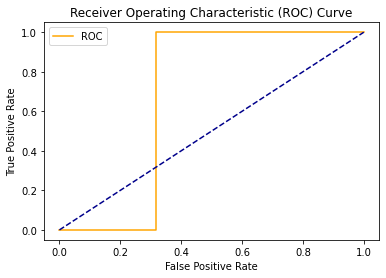

In [40]:
plot_roc_curve(fpr,tpr)